## 학습정리

### 12장. k-NN
* 근접 이웃 분류(nearest neighbors classification)
    * 모든 이웃을 고려했을 때보다 근처의 가장 가까운 이웃들만 선별한다면 더 나은 추정이 가능할 것
 
#### 12.1 모델
* k-NN(k-Nearest Neighbors, k-근접 이웃)  
    * 가장 단순한 예측 모델 중 하나
    * k-NN의 요소
        * 거리를 재는 방법
        * 서로 가까운 점들은 유사하다는 가정
    * 궁금한 점 주변에 있는 것만 보면 되기 떄문에 전체 데이터를 뒤지지 않아도 됨
        * 특정 현상의 원인을 파악하는 데는 큰 도움이 되지 않음
    
    * 새로운 데이터 포인트를 분류 
        1. k개의 가장 가까운 포인트를 찾음
        2. 찾아낸 포인트들의 레이블을 보고 투표를 통해 새로운 데이터 포인트의 레이블을 정함
        3. 동점인 항목들을 처리 
            * 여러 1등중 임의로 하나를 정함
            * 거리를 가중치로 사용해서 고려해서 투표
            * 단독 1등이 생길 때까지 k를 하나씩 줄임
     
#### 12.2 예시 : Iris 데이터
* skit-learn 
    * iris data를 제공
    * distance.euclidean(a,b)
    * train_test_split(data, test_size = 0.x ,shuffle = True)
* Named Tuple
    * point와 label로 나눔
    * 산점도 시각화 하기
* 예측 하기
    * 학습 데이터가 '이웃'역할을 하여 평가 데이터를 분류
    * 투표를 위해 k값 결정
        * k가 너무 작으면 이상치가 결과에 큰영향을 줌
        * k가 너무 크면 최빈값이 선택됨

#### 12.3 차원의 저주
* 차원의 저주(curse of dimensionality) : 고차원 공간은 엄청나게 넓기 때문에 고차원에서 데이터들은 서로 근접하지 않게 됨
    * 차원이 증가할수록 점들 간 평균 거리도 증가
    * 고차원일 때는 근접 이웃들이 평균거리와 큰 차이가 나지 않음
        * 거리가 크게 의미를 가지지 않게 됨
* 공간의 성김(sparsity) : 데이터가 기하 급수적으로 많아지지 않으면 고차원에서의 빈 공간은 우리가 예측하고 싶은 값을 포함한 모든 점에게 공통적으로 먼 공간이 된다.
    * 고차원에서 k-NN을 이용하려면 먼저 차원 축소를 해야한다

#### 12.4 더 공부해 보고 싶다면
* scikit-learn : 근접이웃 모델

## code

In [2]:
# k-nn : sklearn에서도 제공
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import requests
import numpy as np
import pandas as pd

In [12]:
# 투표를 집계하는 함수
from typing import List
# Vector type
Vector = List[float]
from collections import Counter



def raw_majority_vote(labels : List[str]) -> str :
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0] # most_common()최빈값 
    return winner

In [6]:
raw_majority_vote(['a','b','c','d']) == 'b' # 동점을 처리해야함

False

In [7]:
# 투표집계, 동점자 처리
def majority_vote(labels : List[str]) -> str :
    """labels는 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬되어 있다고 가정"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    
    if num_winners == 1 :
        return winner             # 1등이 하나이면 반환
    else :
        return majority_vote(labels[:-1]) # 가장 먼 데이터를 제외하고 다시 찾음

In [11]:
majority_vote(['a','b','c','b','a']) == 'b'  # a,b가 동점, 가장 끝의 a를 제외하고 다시 계산 : b가 1등

True

In [13]:
# 분류기
from typing import NamedTuple
from scipy.spatial import distance #distance.euclidean(a, b)

class LabeledPoint(NamedTuple) :
    point : Vector
    label : str

def knn_classify(k : int,
                labeled_points : List[LabeledPoint],
                new_point : Vector) -> str :
    # 레이블된 포인트를 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬
    by_distance = sorted(labeled_points, key=lambda lp: distance.euclidean(lp.point, new_point))
    
    # 가장 가까운 k 데이터 포인트의 레이블을 살펴보고
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # 투표
    return majority_vote(k_nearest_labels)

In [29]:
# iris data sikit-learn에서 부르기 
Iris = load_iris()

iris_data = pd.DataFrame(data = np.c_[Iris['data'], Iris['target']], columns = Iris["feature_names"]+['target'])
iris_data['target'] = iris_data['target'].map({0 : "setosa", 1:"versicolor", 2:"virginica"})
iris_data = np.array(iris_data)
iris_data

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [34]:

# 첫 네가지 측정치를 사용해서 종을 분류하는 모델 만들기
# 근접 이웃 함수 : LabeledPoint

from typing import Dict
import csv
from collections import defaultdict

#각 행마다 label,point나눠줌 
def parse_iris_row(row : List[str]) -> LabeledPoint :
    """꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 분류"""
    measurements = [float(value) for value in row[:-1]] # 맨끝의 label빼고 point
    # 분류는 "Irisi-virginica"와 같이 나오는데 그중 "virginica"만 뽑아오자 
    label = row[-1] # 맨끝 : label
    return LabeledPoint(measurements, label)

# Labeled
iris_labeled_data = [parse_iris_row(iris_data[i]) for i in range(len(iris_data))]

# 데이터를 살펴보기 위해 종/레이블로 무리지어 보기
points_by_species : Dict[str, List[Vector]] = defaultdict(list)

for iris in iris_labeled_data :
    points_by_species[iris.label].append(iris.point)






In [33]:
[parse_iris_row(iris_data[i]) for i in range(len(iris_data))]

[LabeledPoint(point=[5.1, 3.5, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.0, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.7, 3.2, 1.3, 0.2], label='setosa'),
 LabeledPoint(point=[4.6, 3.1, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[5.0, 3.6, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[5.4, 3.9, 1.7, 0.4], label='setosa'),
 LabeledPoint(point=[4.6, 3.4, 1.4, 0.3], label='setosa'),
 LabeledPoint(point=[5.0, 3.4, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[4.4, 2.9, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.1, 1.5, 0.1], label='setosa'),
 LabeledPoint(point=[5.4, 3.7, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[4.8, 3.4, 1.6, 0.2], label='setosa'),
 LabeledPoint(point=[4.8, 3.0, 1.4, 0.1], label='setosa'),
 LabeledPoint(point=[4.3, 3.0, 1.1, 0.1], label='setosa'),
 LabeledPoint(point=[5.8, 4.0, 1.2, 0.2], label='setosa'),
 LabeledPoint(point=[5.7, 4.4, 1.5, 0.4], label='setosa'),
 LabeledPoint(point=[5.4, 3.9, 1.3, 0.4], label='setosa'

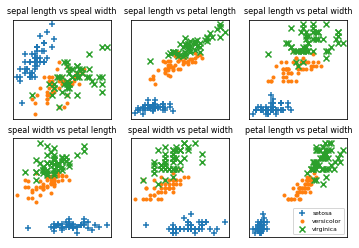

In [35]:
# 측정치의 산점도
from matplotlib import pyplot as plt
metrics = ['sepal length', 'speal width', 'petal length', 'petal width']
pairs = [(i,j) for i in range(4) for j in range(4) if i < j] # 4가지를 중 두가지를 짝지음 
marks = ['+','.','x'] 

fig, ax = plt.subplots(2,3)

for row in range(2) :
    for col in range(3) :
        i,j = pairs[3*row + col] # 3*row + col = 0+0,1,2 | 3*1+0,1,2 = 0 ~ 6
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}" , fontsize = 8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs,ys, marker = mark, label=species)
            

ax[-1][-1].legend(loc = 'lower right', prop = {'size' : 6})
plt.show()
        

In [36]:
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [47]:
# 학습데이터와 평가 데이터로 나눔/ shuffle이기 때문에 다시 섞으면 정확도가 변할 수 있음
from sklearn.model_selection import train_test_split 

iris_train, iris_test = train_test_split(iris_labeled_data, test_size = 0.3, shuffle = True)
print("train : ",len(iris_train)/len(iris_labeled_data))
print("test  : ",len(iris_test)/len(iris_labeled_data))

train :  0.7
test  :  0.3


In [48]:
# 우리가 (predicted, actual)을 몇 번 살펴보는지 추적
from typing import Tuple

confusion_matrix : Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0

for iris in iris_test :
    predicted = knn_classify(5, iris_train, iris.point)
    actual = iris.label
    
    if predicted == actual :
        num_correct += 1
    confusion_matrix[(predicted, actual)] += 1

pct_correct = num_correct / len(iris_test)
print(pct_correct, confusion_matrix)



0.9777777777777777 defaultdict(<class 'int'>, {('virginica', 'virginica'): 17, ('versicolor', 'versicolor'): 15, ('setosa', 'setosa'): 12, ('virginica', 'versicolor'): 1})
